In [ ]:
# Instalar dependencias necesarias
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Importar las librerías necesarias
from roboflow import Roboflow
from ultralytics import YOLO
import os
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [ ]:
# Conectar con Roboflow y descargar el dataset
rf = Roboflow(api_key="xkhRe9qWvo7Voy4ewaho")  # Coloca tu API key aquí
project = rf.workspace("miguel-angel-leon-cardenas-fske1").project("detector-de-enlatados")
version = project.version(2)  # Cambiar a la nueva versión del dataset
dataset = version.download("yolov8")  # Descargar dataset en formato YOLOv8

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.7, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Detector-de-enlatados--2 in yolov8:: 100%|██████████| 1855/1855 [00:00<00:00, 4129.34it/s]


In [ ]:
# Verificar el contenido descargado
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
# Cargar el modelo YOLOv8 preentrenado
model = YOLO('yolov8n.pt')  # Modelo YOLOv8 ligero, puedes cambiarlo a 'yolov8s.pt', 'yolov8m.pt', etc.

100%|██████████| 6.25M/6.25M [00:00<00:00, 288MB/s]


In [ ]:
# Verifica el contenido del directorio de la versión 2 del dataset
!ls /content/Detector-de-enlatados--2/

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
# Verifica el contenido del archivo data.yaml en la ubicación correcta
data_yaml_path = '/content/Detector-de-enlatados--2/data.yaml'

# Lee el archivo data.yaml
with open(data_yaml_path, 'r') as file:
    data_yaml = file.read()

print(data_yaml)

names:
- Enlatados
- Granos
nc: 2
roboflow:
  license: CC BY 4.0
  project: detector-de-enlatados
  url: https://universe.roboflow.com/miguel-angel-leon-cardenas-fske1/detector-de-enlatados/dataset/2
  version: 2
  workspace: miguel-angel-leon-cardenas-fske1
test: ../test/images
train: Detector-de-enlatados--2/train/images
val: Detector-de-enlatados--2/valid/images



In [ ]:
# Lee el archivo data.yaml
data_yaml_path = '/content/Detector-de-enlatados--2/data.yaml'

with open(data_yaml_path, 'r') as file:
    data_yaml = file.read()

# Reemplaza las rutas relativas por rutas absolutas
data_yaml_corrected = data_yaml.replace('Detector-de-enlatados--2/train/images', '/content/Detector-de-enlatados--2/train/images')
data_yaml_corrected = data_yaml_corrected.replace('Detector-de-enlatados--2/valid/images', '/content/Detector-de-enlatados--2/valid/images')
data_yaml_corrected = data_yaml_corrected.replace('../test/images', '/content/Detector-de-enlatados--2/test/images')

# Sobrescribe el archivo data.yaml con las rutas corregidas
with open(data_yaml_path, 'w') as file:
    file.write(data_yaml_corrected)

print("Rutas corregidas en data.yaml")


Rutas corregidas en data.yaml


In [ ]:
# Cargar el modelo YOLOv8 preentrenado
model = YOLO('yolov8n.pt')  # Puedes cambiar 'n' por 's', 'm', 'l', 'x' según el tamaño del modelo

In [ ]:
# Entrenar el modelo con las rutas y etiquetas actualizadas
results = model.train(data='/content/Detector-de-enlatados--2/data.yaml', epochs=100, imgsz=640)

Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Detector-de-enlatados--2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/Detector-de-enlatados--2/train/labels... 852 images, 0 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 2033.81it/s]

train: New cache created: /content/Detector-de-enlatados--2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Detector-de-enlatados--2/valid/labels... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<00:00, 1837.73it/s]

val: New cache created: /content/Detector-de-enlatados--2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.43G     0.7041      2.322      1.262         12        640: 100%|██████████| 54/54 [00:19<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         71         71    0.00341          1       0.58      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.31G     0.7247      1.355      1.233          5        640: 100%|██████████| 54/54 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         71         71      0.522      0.385      0.553      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.31G     0.7896      1.276      1.266         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         71         71      0.413      0.428      0.384      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.3G     0.7993      1.169      1.276          6        640: 100%|██████████| 54/54 [00:16<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         71         71      0.701      0.648      0.717      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.31G     0.7698      1.006       1.25         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         71         71      0.703      0.604       0.73      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.31G     0.7359     0.8845      1.217         12        640: 100%|██████████| 54/54 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         71         71      0.659      0.639      0.838      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.31G     0.7357     0.8349      1.217         11        640: 100%|██████████| 54/54 [00:16<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         71         71      0.872      0.866      0.959      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.31G     0.7105     0.8012      1.199         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         71         71      0.861      0.884      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.31G      0.671     0.6953      1.168         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]

                   all         71         71      0.879      0.899       0.96      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.31G     0.6633     0.6578       1.18          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         71         71      0.683      0.797      0.881      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.31G     0.6439      0.628      1.157          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         71         71      0.889      0.915      0.952      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.31G     0.6527     0.6334      1.164          9        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         71         71      0.828      0.968      0.952      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.31G     0.6373     0.5921       1.14         11        640: 100%|██████████| 54/54 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         71         71      0.901      0.899      0.956      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.3G     0.6274     0.5715      1.144         11        640: 100%|██████████| 54/54 [00:15<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         71         71      0.869      0.901      0.946      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.31G     0.6109     0.5525      1.132          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         71         71      0.936      0.932      0.987      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.3G     0.6031     0.5431       1.12          9        640: 100%|██████████| 54/54 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         71         71      0.905      0.873      0.967      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.31G     0.6056     0.5294      1.124          7        640: 100%|██████████| 54/54 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         71         71      0.934      0.968      0.986      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.31G     0.5868     0.4916      1.113          8        640: 100%|██████████| 54/54 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


                   all         71         71      0.957      0.929      0.975      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.31G     0.5572     0.4906      1.096         13        640: 100%|██████████| 54/54 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         71         71      0.974      0.959       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.3G     0.5879     0.5025      1.103          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         71         71      0.967      0.894      0.983      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.31G     0.5723     0.4701      1.105         10        640: 100%|██████████| 54/54 [00:15<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         71         71      0.947      0.916      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.3G      0.563     0.4604      1.103          7        640: 100%|██████████| 54/54 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         71         71      0.957       0.89      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.31G     0.5697     0.4512      1.102         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         71         71      0.857      0.912       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.3G       0.55      0.436      1.089          9        640: 100%|██████████| 54/54 [00:15<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         71         71      0.961      0.957      0.991      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.31G     0.5461      0.452      1.082          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         71         71      0.997      0.975      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.3G       0.55     0.4544      1.095          7        640: 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         71         71      0.966      0.972      0.994      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.31G     0.5382     0.4215      1.077          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         71         71      0.984      0.971      0.993      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.3G     0.5285     0.4212       1.07         10        640: 100%|██████████| 54/54 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         71         71      0.902      0.899      0.959      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.31G     0.5465     0.4302      1.081         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         71         71       0.96      0.944      0.985      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.31G     0.5434     0.4369      1.086          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         71         71       0.98        0.9      0.984      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.31G     0.5115     0.4223      1.068         11        640: 100%|██████████| 54/54 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         71         71      0.978      0.902      0.992      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.31G     0.5167     0.4015      1.068         14        640: 100%|██████████| 54/54 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         71         71      0.951      0.989      0.994      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.31G     0.5088     0.3991      1.056          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         71         71      0.968          1      0.994       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.31G     0.4975     0.3811      1.051         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         71         71      0.968      0.956      0.988      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.31G     0.5186      0.396      1.063          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         71         71      0.992      0.986      0.994      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.31G     0.5089     0.3867      1.054          7        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         71         71      0.966      0.986      0.991      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.31G     0.5115     0.3912      1.074          9        640: 100%|██████████| 54/54 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         71         71      0.997      0.993      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.31G     0.4923     0.3711      1.047         11        640: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         71         71      0.995      0.999      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.31G     0.4831     0.3667      1.054          6        640: 100%|██████████| 54/54 [00:16<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         71         71      0.983      0.982      0.994      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.31G     0.4744     0.3494      1.043         11        640: 100%|██████████| 54/54 [00:15<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         71         71      0.966      0.943       0.96      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.31G     0.4887     0.3624      1.047         16        640: 100%|██████████| 54/54 [00:15<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         71         71      0.979      0.994      0.993      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.3G     0.4765     0.3569      1.037          7        640: 100%|██████████| 54/54 [00:15<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         71         71      0.982      0.999      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.31G     0.4534     0.3399      1.029          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         71         71      0.984      0.996      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.31G     0.4653     0.3501      1.033         11        640: 100%|██████████| 54/54 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         71         71      0.993      0.986      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.31G      0.478     0.3488      1.035         13        640: 100%|██████████| 54/54 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         71         71      0.988      0.998      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.3G     0.4631     0.3449      1.039          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         71         71      0.983      0.986      0.994      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.31G     0.4546     0.3349      1.035          7        640: 100%|██████████| 54/54 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         71         71      0.973      0.997      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.31G     0.4494     0.3329      1.025          7        640: 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         71         71      0.973       0.96      0.991      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.31G     0.4517     0.3327      1.022         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         71         71      0.929      0.986      0.987      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.3G     0.4567     0.3333      1.034          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         71         71       0.97      0.986      0.994      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.31G     0.4506     0.3353      1.032          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         71         71       0.98      0.986      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.3G     0.4522     0.3233      1.026          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         71         71      0.967          1      0.991      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.31G     0.4506     0.3356      1.037          5        640: 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

                   all         71         71      0.997          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.31G     0.4427     0.3219      1.021         15        640: 100%|██████████| 54/54 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         71         71      0.943      0.976      0.992      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.31G     0.4293     0.3131      1.021          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         71         71      0.972      0.989      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.31G     0.4317      0.309      1.019         14        640: 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         71         71      0.976      0.972      0.993      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.31G     0.4356     0.3238      1.016         11        640: 100%|██████████| 54/54 [00:16<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         71         71      0.983          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.31G     0.4284     0.3179      1.007         14        640: 100%|██████████| 54/54 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         71         71      0.993      0.986      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.31G     0.4173     0.3052      1.011         10        640: 100%|██████████| 54/54 [00:15<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         71         71      0.981      0.986      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.31G     0.4313     0.3166      1.023         14        640: 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         71         71      0.983          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.31G     0.4207     0.3025      1.005         11        640: 100%|██████████| 54/54 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         71         71      0.965      0.986      0.993      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.3G     0.4242     0.3033      1.018          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         71         71      0.997      0.988      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.31G     0.3984     0.2919     0.9984          9        640: 100%|██████████| 54/54 [00:15<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         71         71      0.979      0.986      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.31G     0.4177     0.3015      1.015         10        640: 100%|██████████| 54/54 [00:15<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         71         71      0.986       0.99      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.31G     0.4013     0.2906     0.9979         12        640: 100%|██████████| 54/54 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         71         71      0.997      0.998      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.3G     0.3905     0.2816     0.9891         13        640: 100%|██████████| 54/54 [00:15<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         71         71      0.979      0.999      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.31G     0.4192     0.2883      1.015          5        640: 100%|██████████| 54/54 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         71         71      0.968      0.986      0.989      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.31G     0.3958     0.2821     0.9959          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         71         71       0.97      0.986      0.993      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.31G     0.3935     0.2742     0.9905          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         71         71       0.98      0.997      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.3G     0.3842     0.2766     0.9907         12        640: 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         71         71      0.995       0.98      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.31G     0.3723     0.2646     0.9895         13        640: 100%|██████████| 54/54 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         71         71      0.992      0.974      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.3G     0.3883     0.2792     0.9988          6        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         71         71      0.976      0.971      0.987      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.31G     0.3851     0.2676     0.9824         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         71         71      0.982      0.986      0.994      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.31G     0.3767     0.2639     0.9889         12        640: 100%|██████████| 54/54 [00:16<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         71         71      0.996      0.984      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.31G     0.3763     0.2552     0.9793         14        640: 100%|██████████| 54/54 [00:16<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         71         71      0.996      0.987      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.3G     0.3672     0.2665     0.9861          5        640: 100%|██████████| 54/54 [00:16<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         71         71      0.972      0.999      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.31G     0.3756     0.2634     0.9856         13        640: 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         71         71      0.997      0.987      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.31G     0.3791     0.2628     0.9869          7        640: 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         71         71      0.998      0.987      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.31G     0.3588     0.2529     0.9729         13        640: 100%|██████████| 54/54 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         71         71      0.985      0.998      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.31G     0.3654     0.2597     0.9802          9        640: 100%|██████████| 54/54 [00:15<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         71         71      0.995      0.987      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.31G     0.3713     0.2597     0.9852         13        640: 100%|██████████| 54/54 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         71         71      0.995      0.999      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.31G     0.3752     0.2626     0.9793         11        640: 100%|██████████| 54/54 [00:15<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         71         71      0.994      0.999      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.31G     0.3605     0.2614     0.9772          7        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         71         71      0.997          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.31G     0.3434     0.2377     0.9647         10        640: 100%|██████████| 54/54 [00:16<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         71         71      0.994      0.999      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.31G      0.362     0.2468      0.979          9        640: 100%|██████████| 54/54 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         71         71       0.98      0.999      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.31G     0.3564     0.2452     0.9779          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         71         71      0.987      0.997      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.31G     0.3466     0.2403     0.9723          6        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         71         71      0.991      0.999      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.31G     0.3432     0.2325     0.9673         11        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         71         71      0.983          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.31G     0.3403     0.2322     0.9647          9        640: 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         71         71      0.986      0.995      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.3G     0.3442     0.2377     0.9712          6        640: 100%|██████████| 54/54 [00:15<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         71         71      0.996      0.983      0.995      0.927


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.31G     0.2437     0.2044     0.9001          4        640: 100%|██████████| 54/54 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         71         71      0.983      0.999      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.3G     0.2303     0.1792     0.8884          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         71         71      0.984          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.31G     0.2276     0.1796     0.8883          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         71         71      0.984          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.3G     0.2253     0.1789      0.894          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         71         71      0.979      0.999      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.31G      0.226     0.1739     0.8911          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         71         71       0.98      0.999      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.3G     0.2118     0.1743     0.8722          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         71         71      0.983      0.999      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.31G       0.21     0.1649     0.8921          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         71         71      0.984          1      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.3G     0.2106     0.1652     0.8816          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         71         71      0.995          1      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.31G     0.2128     0.1622     0.8882          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         71         71      0.992          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.3G     0.2066     0.1558     0.8637          4        640: 100%|██████████| 54/54 [00:15<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         71         71      0.994          1      0.995      0.945



100 epochs completed in 0.498 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         71         71      0.992          1      0.995      0.945
             Enlatados         35         35      0.998          1      0.995       0.98
                Granos         36         36      0.986          1      0.995       0.91
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Evaluar el modelo
metrics = model.val()

Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/Detector-de-enlatados--2/valid/labels.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


                   all         71         71      0.992          1      0.995      0.946
             Enlatados         35         35      0.998          1      0.995       0.98
                Granos         36         36      0.986          1      0.995      0.912
Speed: 0.3ms preprocess, 14.5ms inference, 0.1ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
# Guardar el mejor modelo entrenado
model.save("best_yolov8_model_v2.pt")

In [ ]:
# Imprimir las métricas clave
print(f"Precision: {metrics.box.map50:.4f}, Recall: {metrics.box.map75:.4f}, mAP50: {metrics.box.map50:.4f}")


Precision: 0.9950, Recall: 0.9945, mAP50: 0.9950


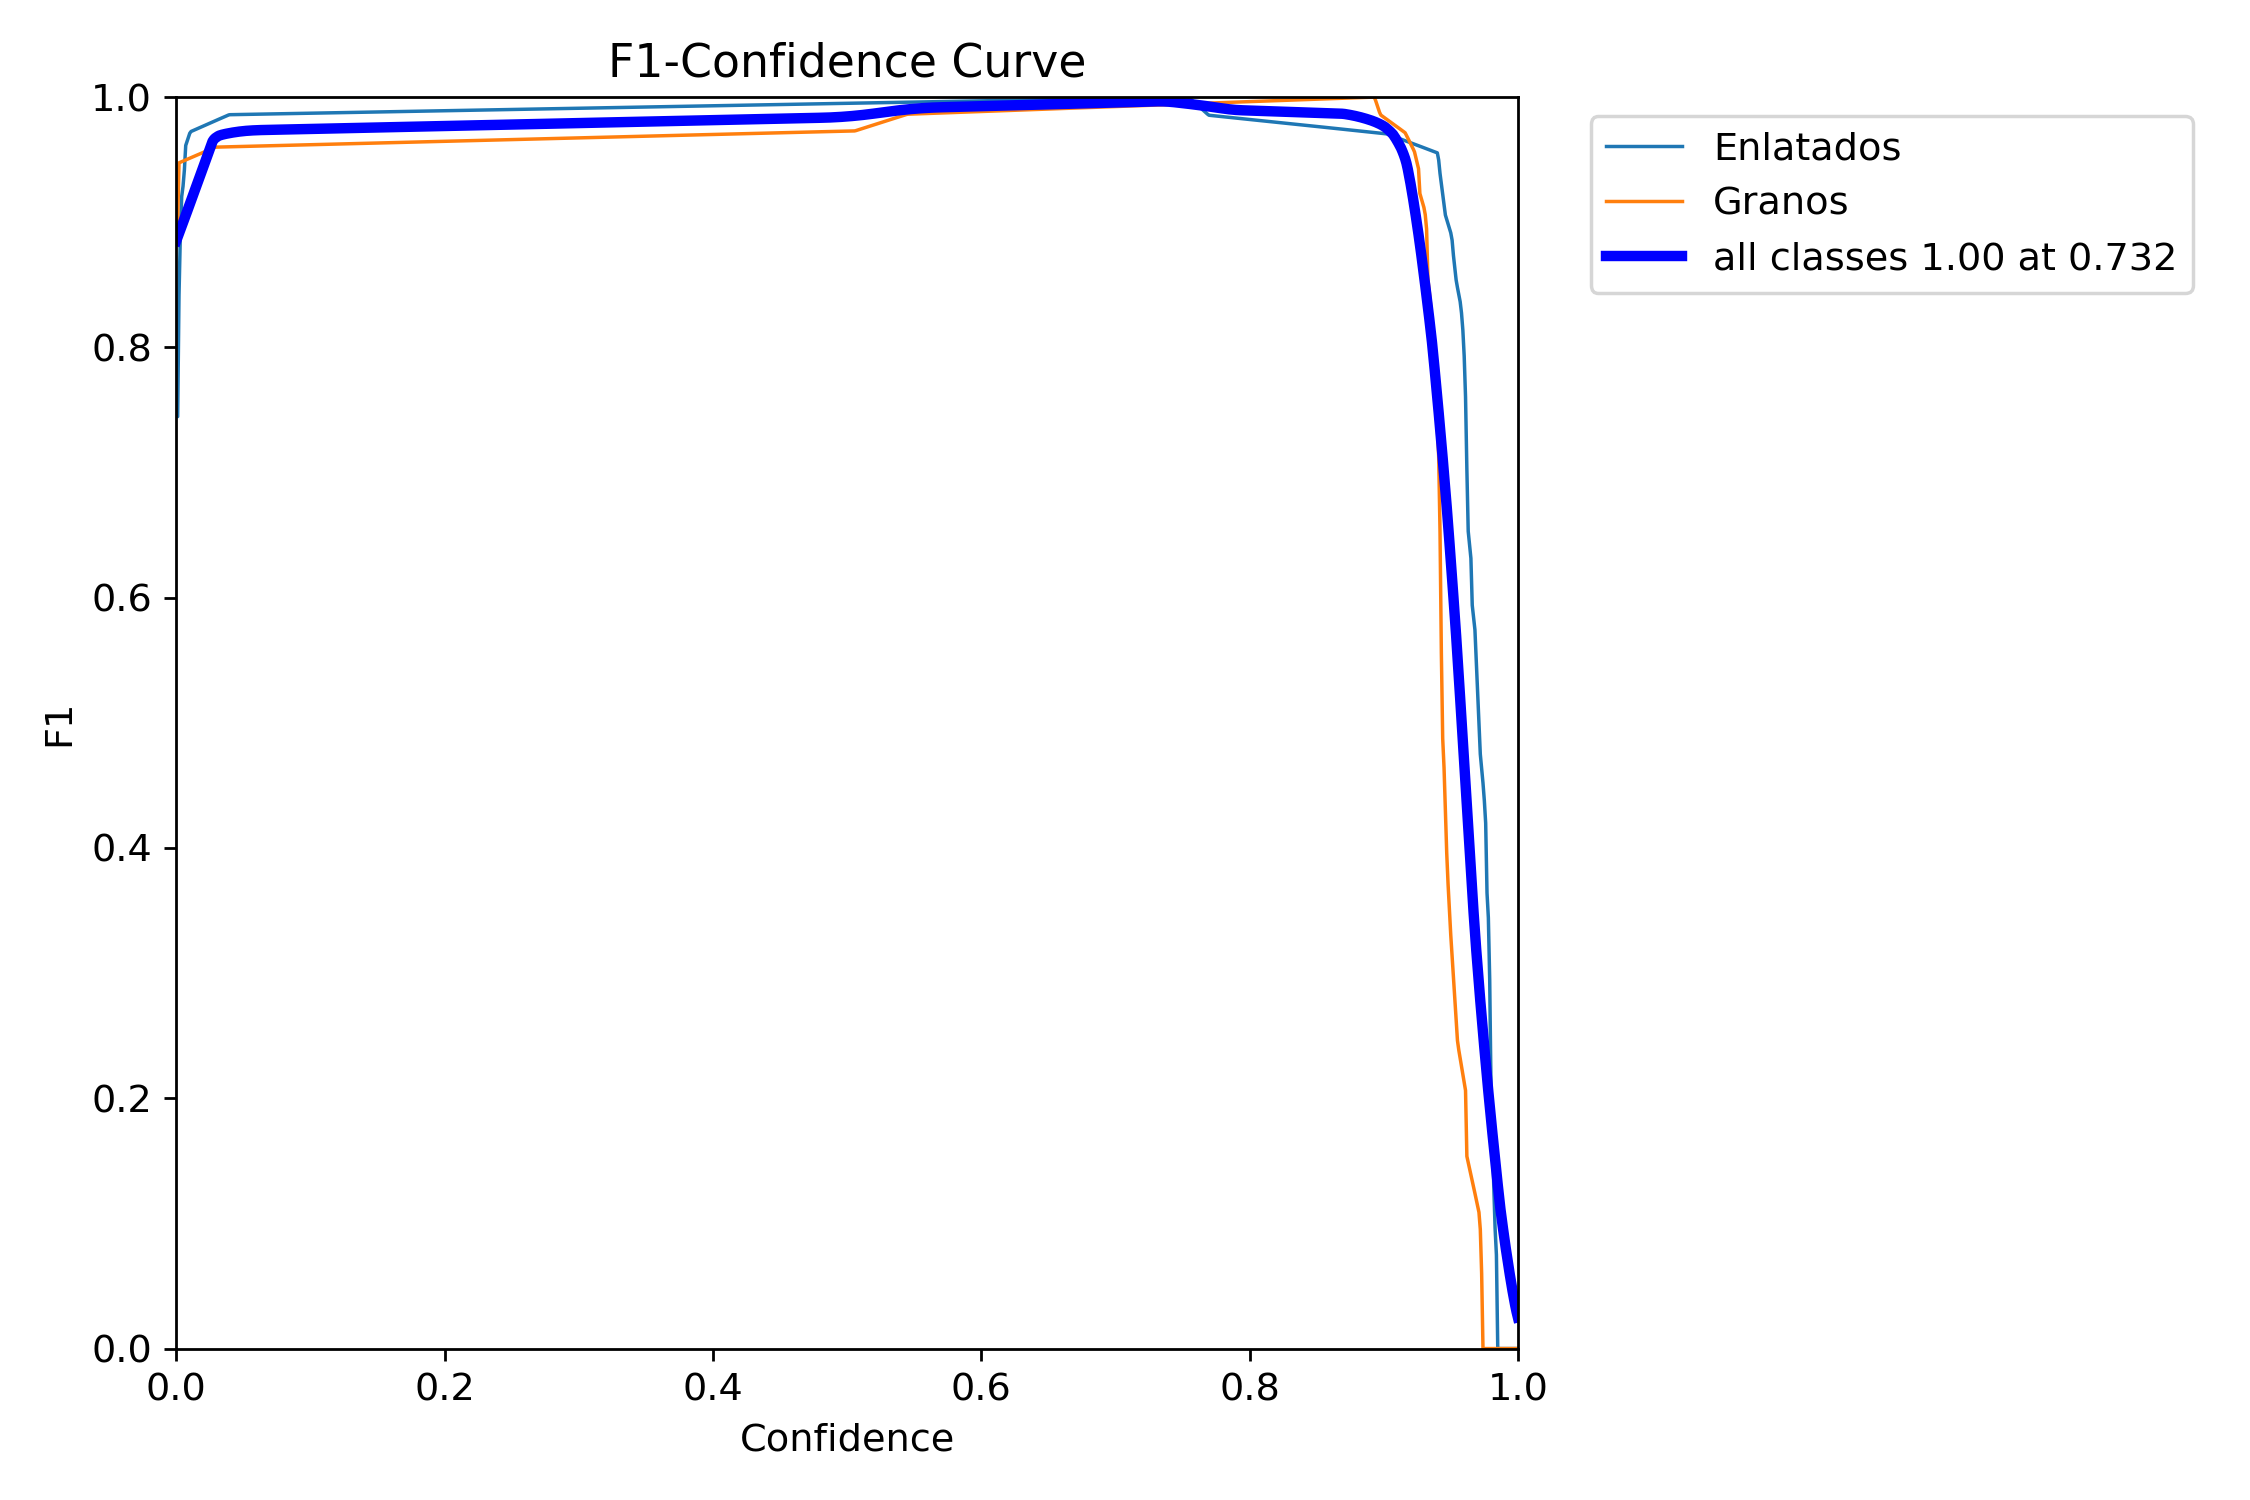

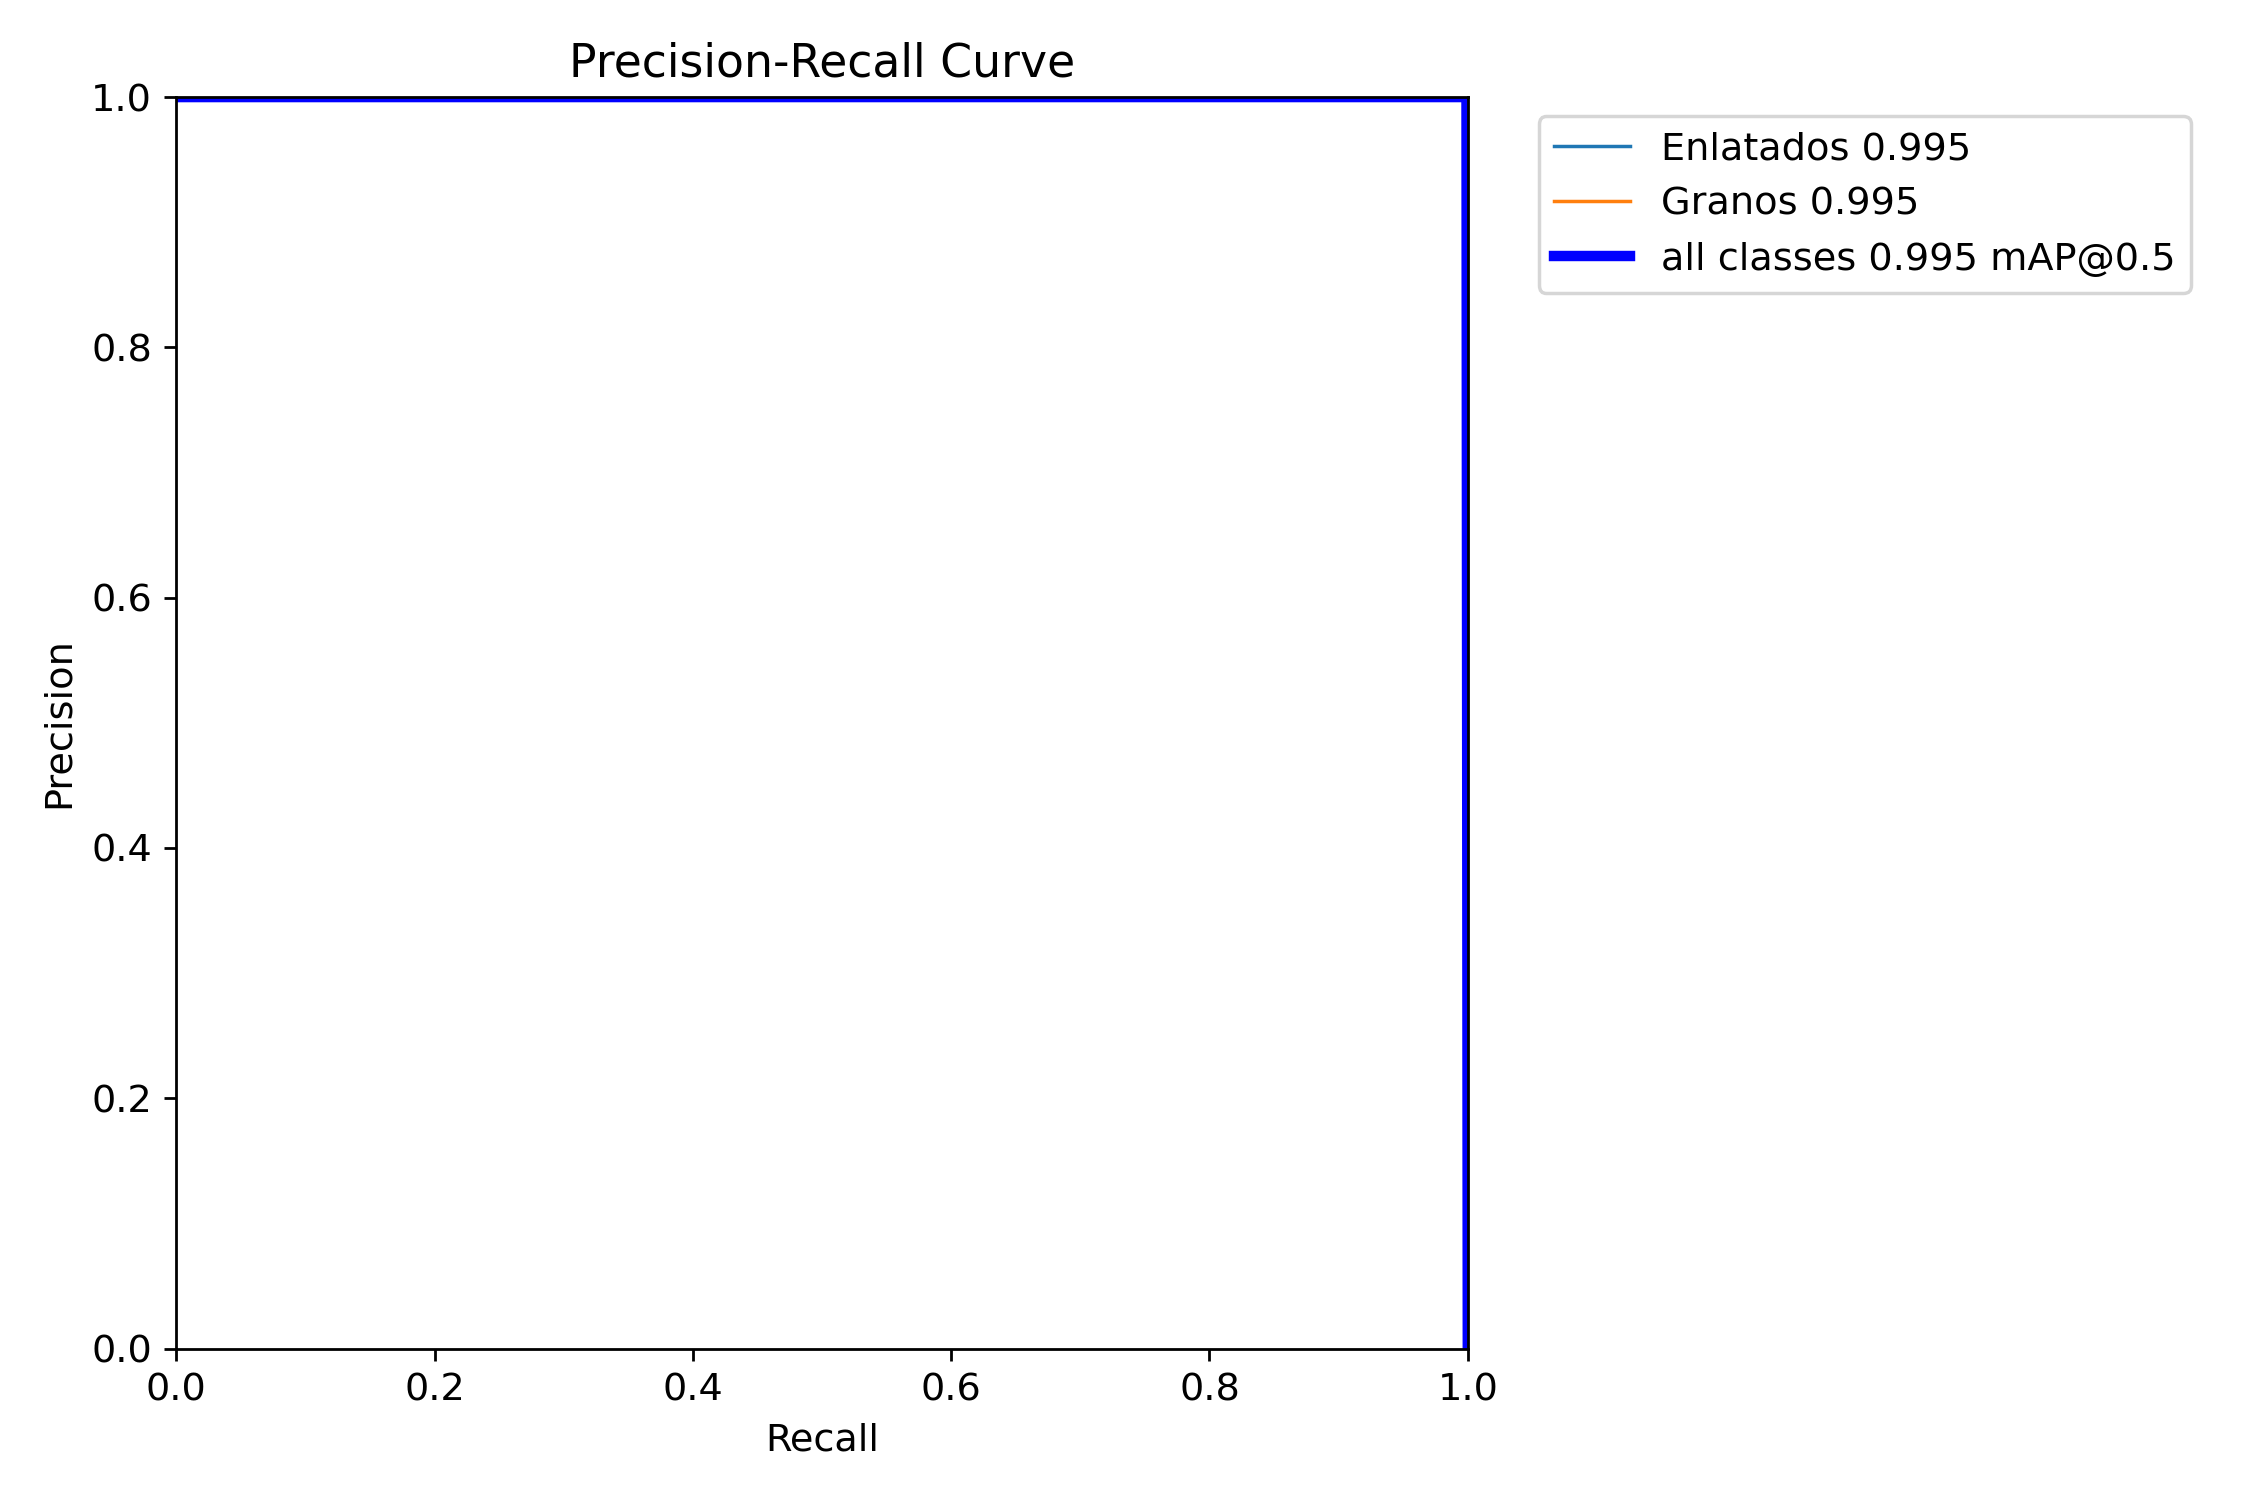

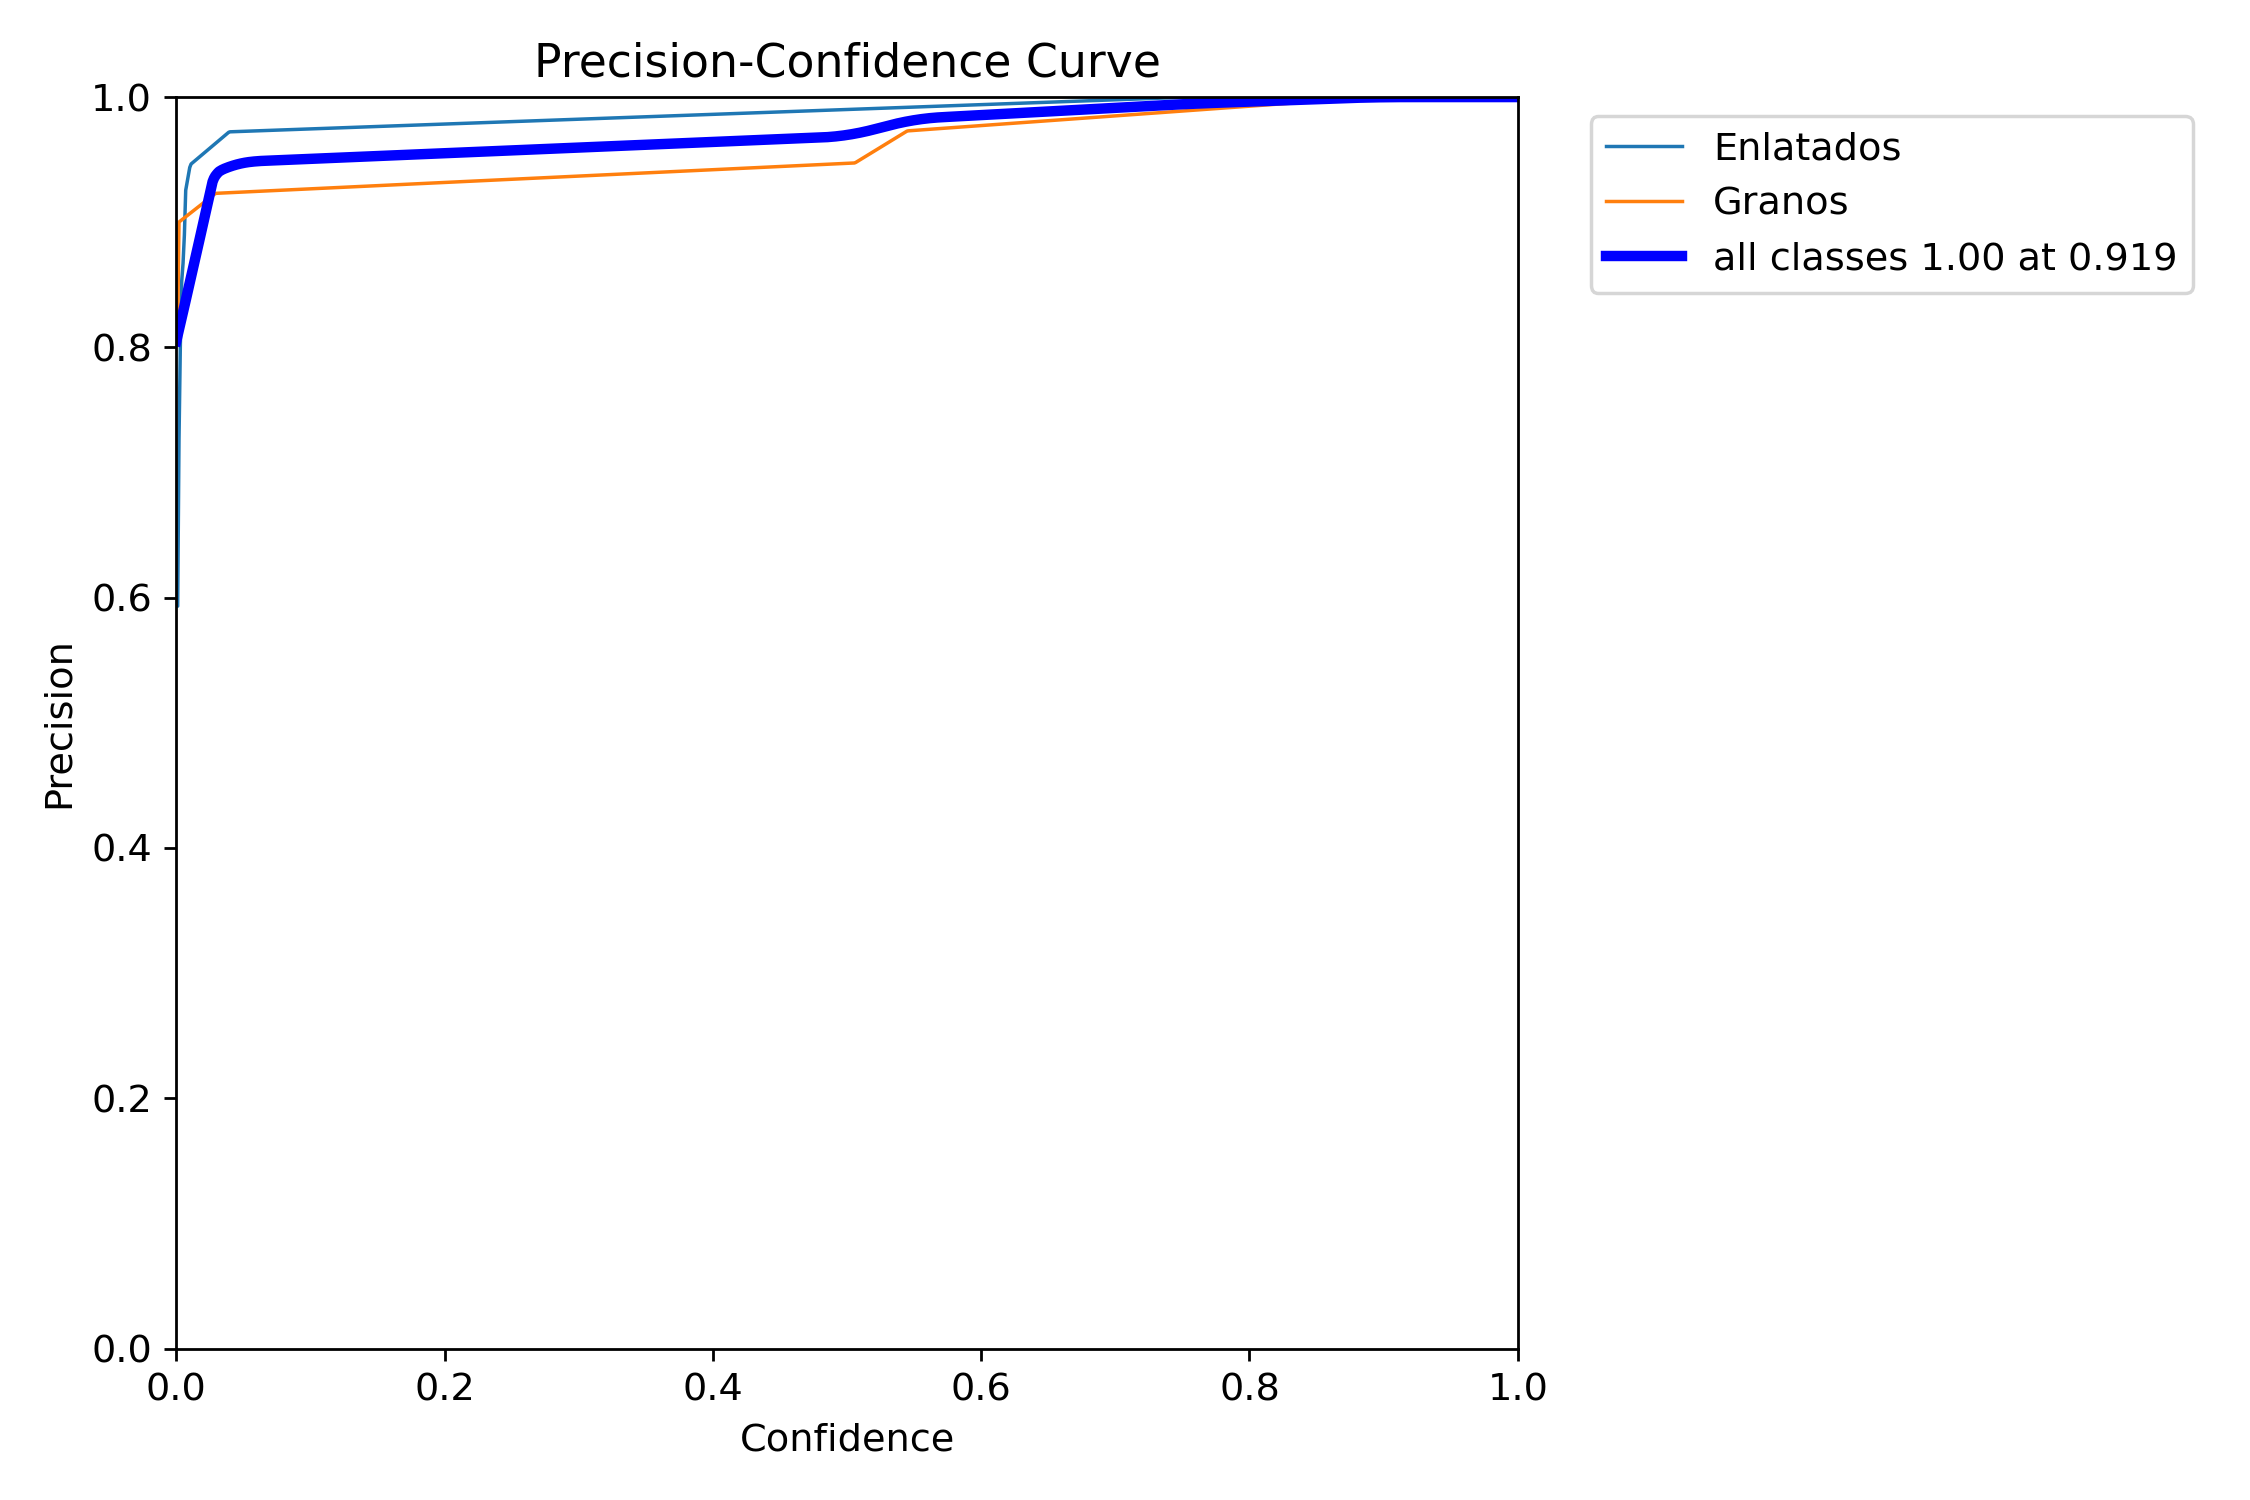

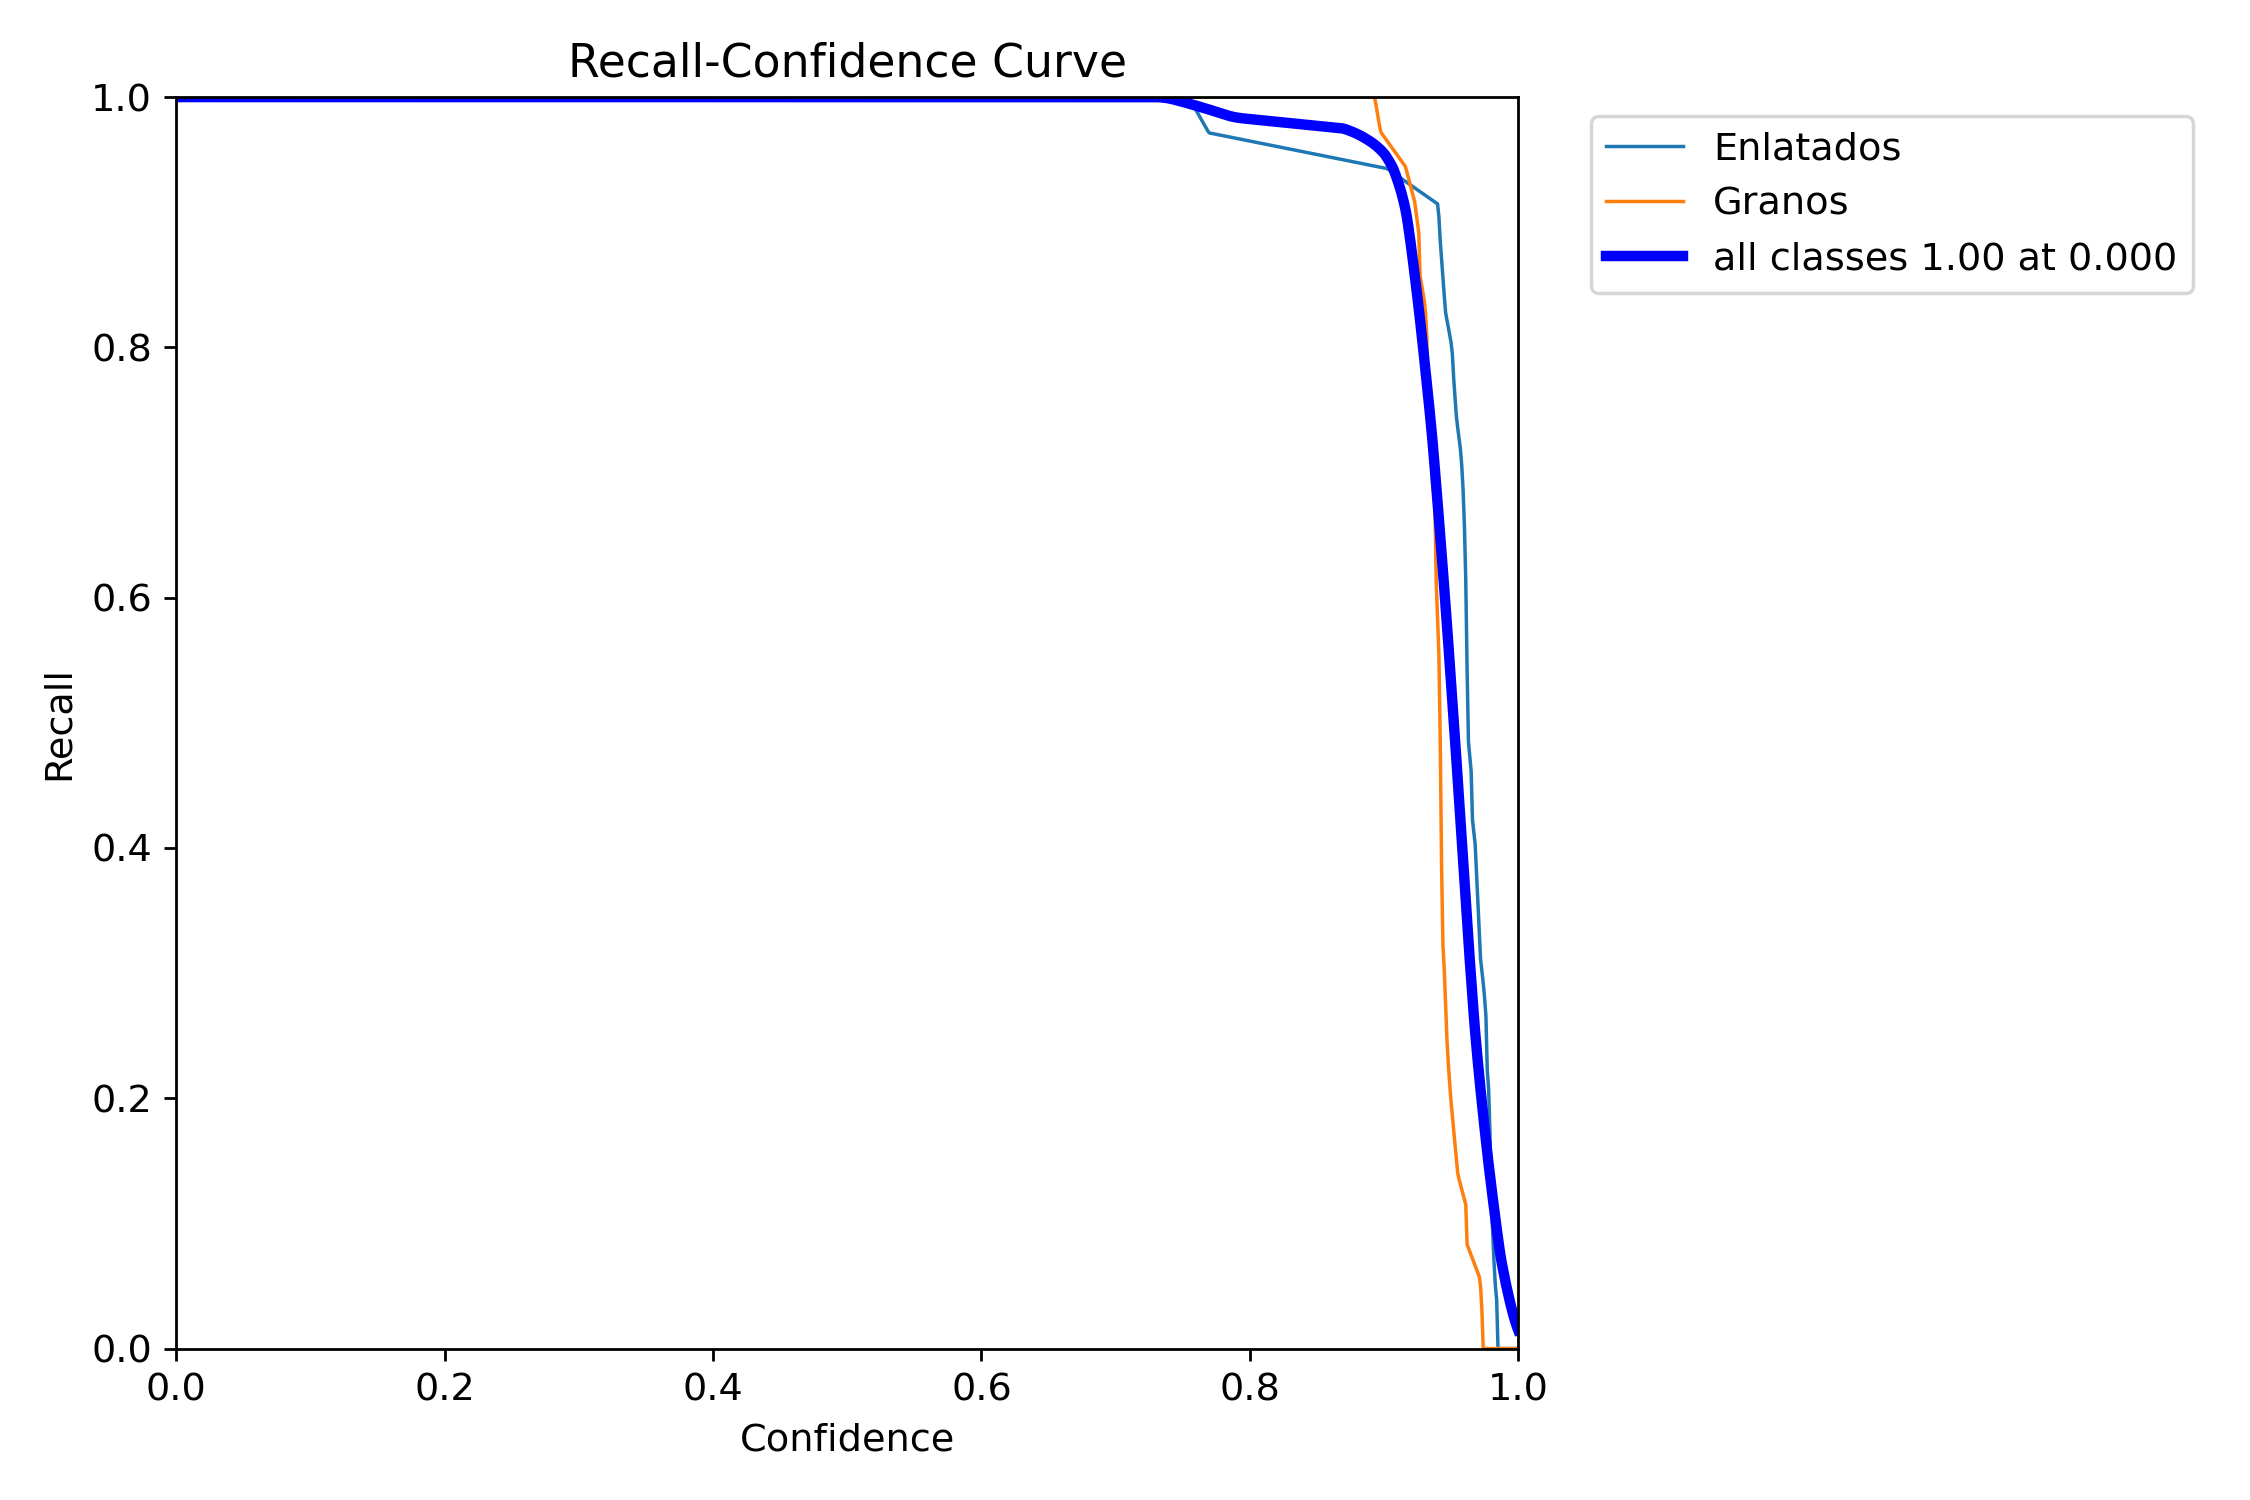

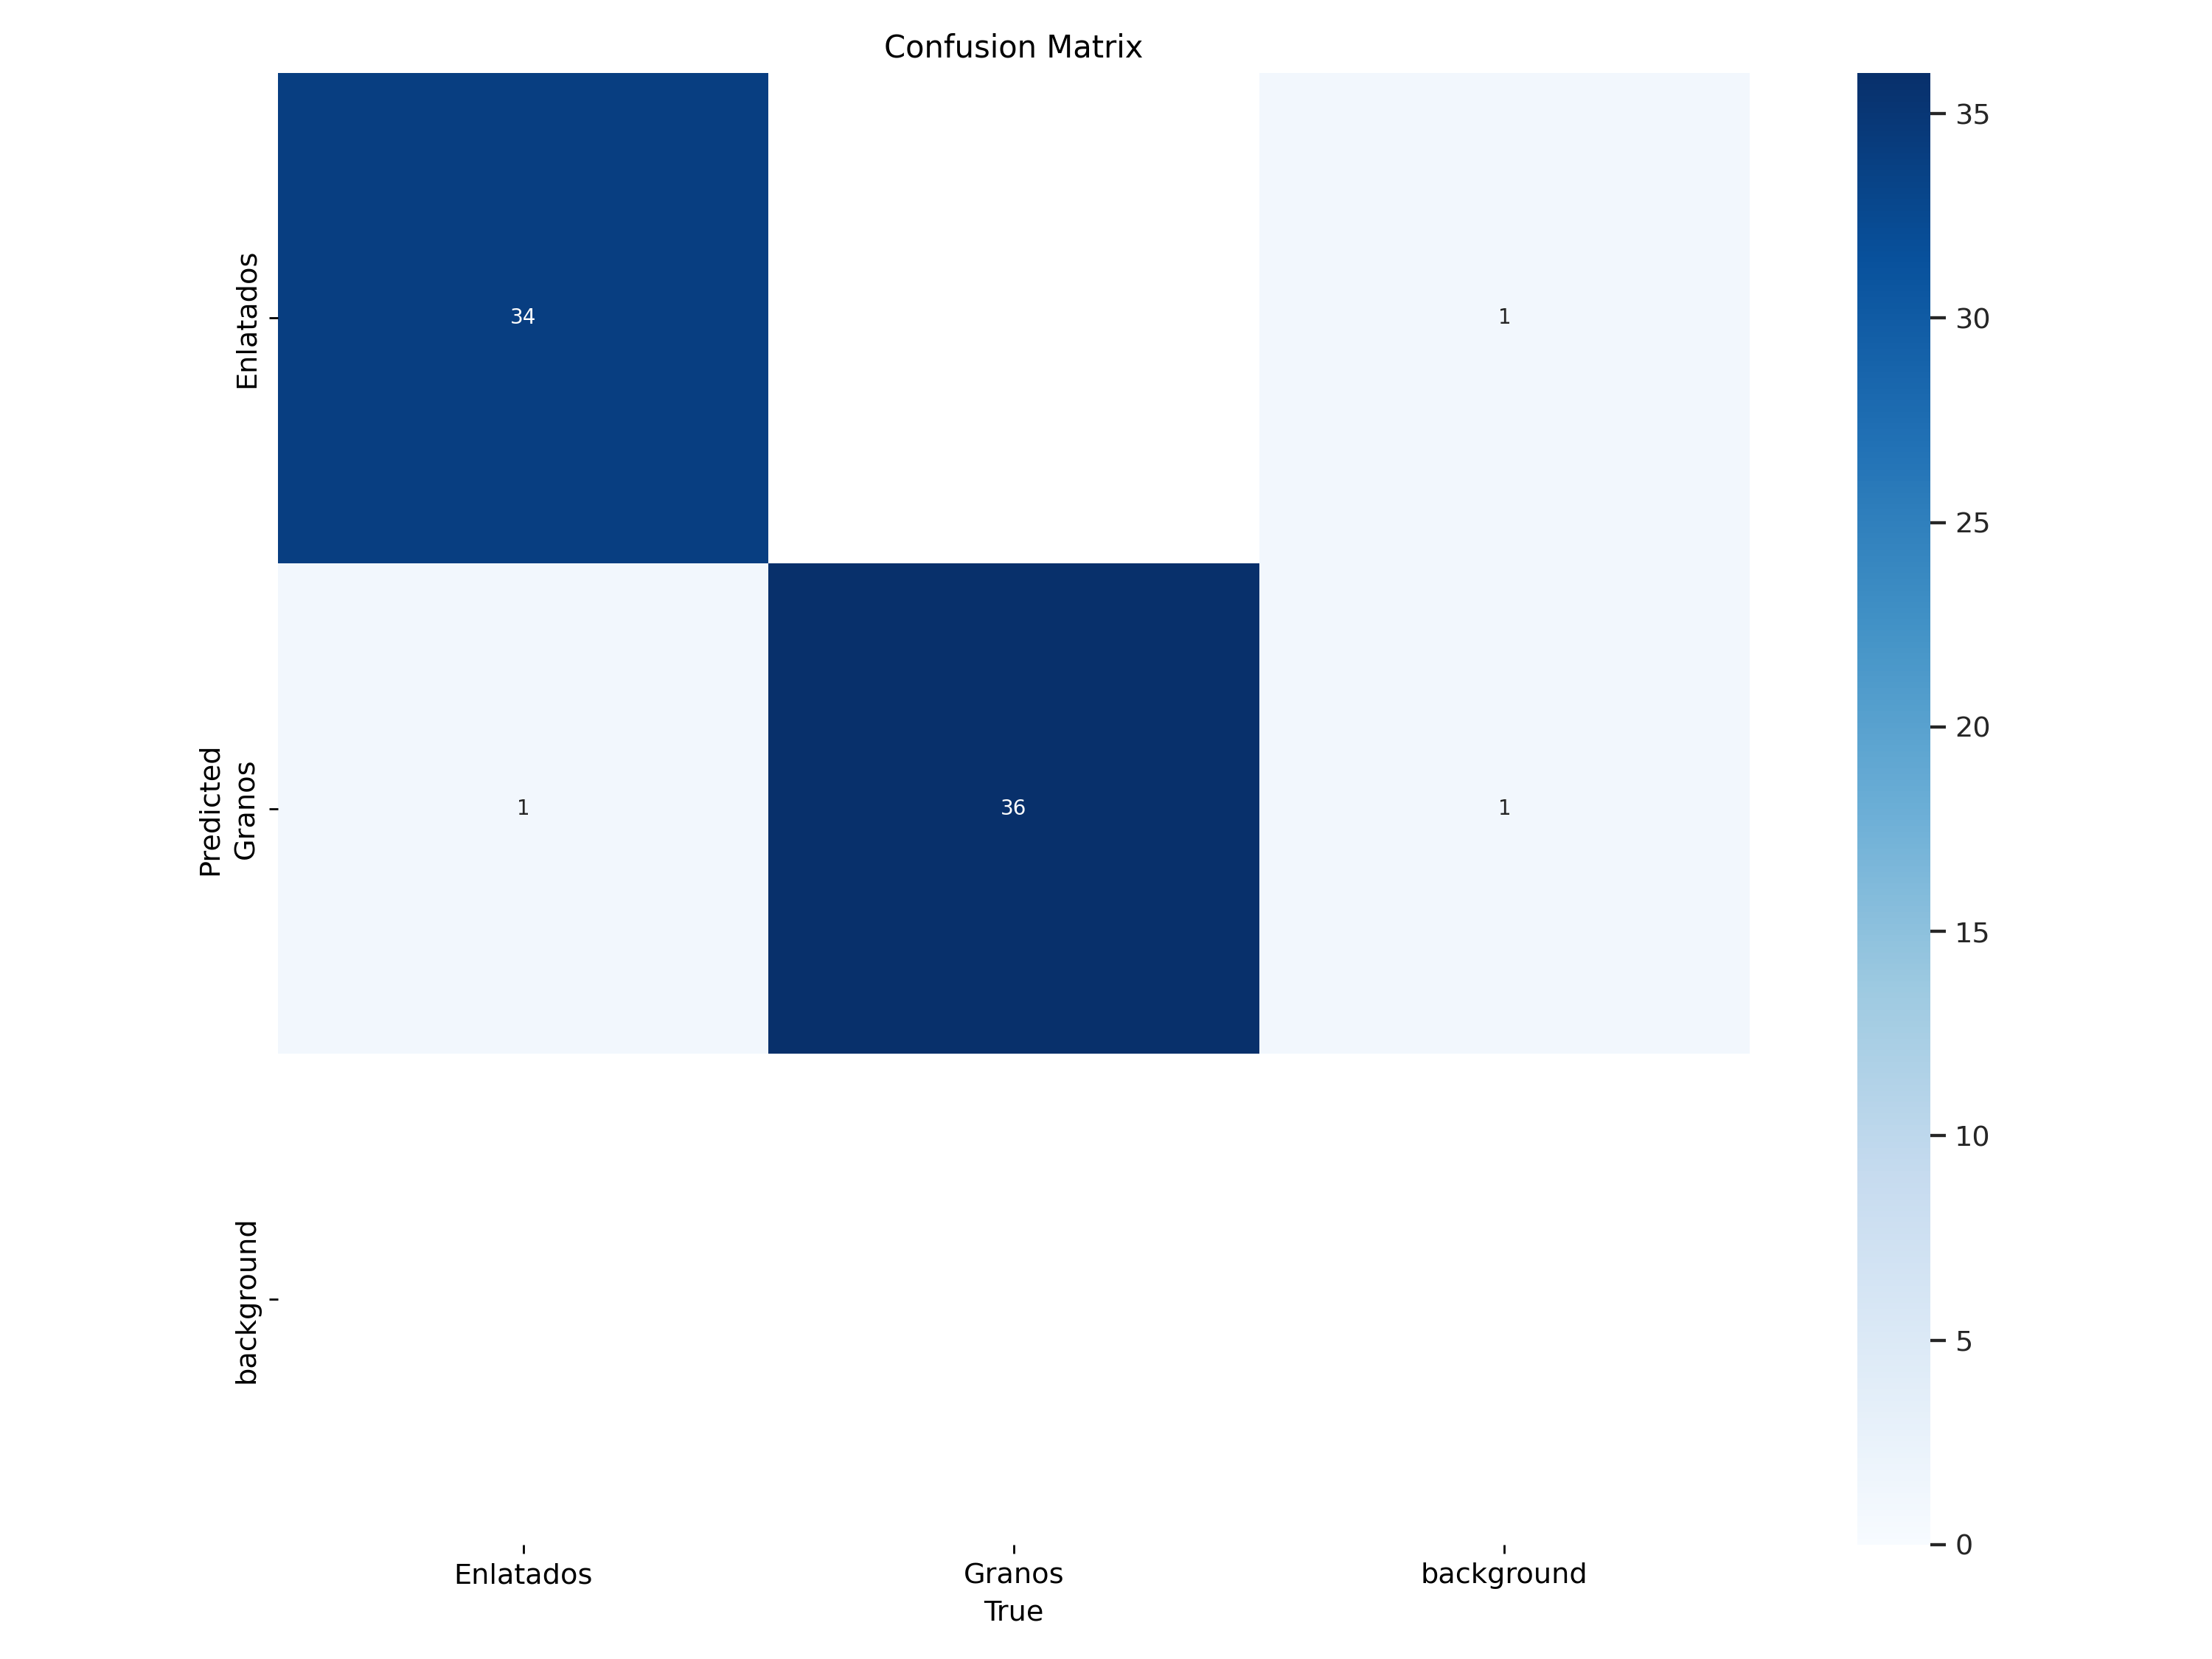

In [ ]:
from IPython.display import Image, display

# Mostrar las imágenes generadas durante el entrenamiento
image_paths = [
    'runs/detect/train/F1_curve.png',
    'runs/detect/train/PR_curve.png',
    'runs/detect/train/P_curve.png',
    'runs/detect/train/R_curve.png',
    'runs/detect/train/confusion_matrix.png'
]

# Mostrar cada imagen
for image_path in image_paths:
    display(Image(filename=image_path))





image 1/1 /content/granos 2.jpeg: 640x480 1 Granos, 10.4ms
Speed: 3.4ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict9


array([[[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [  0,   1,  12],
        [  4,   4,  16],
        [  4,   4,  16]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [ 30,  34,  45],
        [ 17,  17,  29],
        [ 17,  17,  29]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [ 25,  29,  40],
        [ 25,  25,  37],
        [ 25,  25,  37]],

       ...,

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [ 29,  39,  39],
        [ 42,  50,  49],
        [ 42,  50,  49]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [ 28,  37,  40],
        [ 36,  44,  44],
        [ 36,  44,  43]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [ 28,  37,  40],
        [ 30,  38,  38],
        [ 30,  38,  37]]], dtype=uint8)
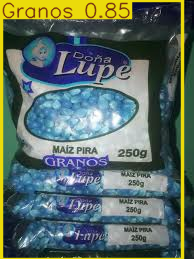

In [ ]:
# Cargar el modelo entrenado
model = YOLO('/content/best_yolov8_model_v2.pt')

# Realizar predicciones sobre una imagen de prueba
image_path = '/content/granos 2.jpeg'  # Coloca aquí la ruta de la imagen de prueba
predictions = model.predict(source=image_path, save=True)

# Mostrar la imagen con los objetos detectados
predictions[0].plot()  # Visualiza la imagen con las predicciones




In [ ]:
# Exportar el modelo entrenado a formato ONNX (u otros formatos compatibles)
model.export(format="onnx")  # Cambia el formato si lo necesitas, por ejemplo "tensorflow" o "coreml"